In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

Before starting the exploratory analysis, I want to answer three main questions:

    1) What numerical factors are most heavily correlated with Sale Price?
    2) Is Location more influential to Sale Price than the most correlated numerical values?
    3) How has the Quality of houses evolved over the years?
    
We will first start by exploring the raw dataset.

In [3]:
data = pd.read_csv('train.csv')
#since there are way too many variables in this dataset, i chose a couple of factors that i was interested in and narrowed the variable list down that way

In [4]:
list(data)

(1460, 81)

As you can see, there are a lot of variables in the initial dataset, I would love to sift through all of the data in these columns for further examination, but for the purposes of this project, i will narrow down the variable count to 10 variables, which are chosen at random.

In [66]:
subset_data = data[['HouseStyle','Neighborhood','OverallCond','OverallQual','LotArea','YearBuilt','SaleCondition','Functional','SalePrice','KitchenQual']]

At this point, we still have no clue what the data in this data actually holds. Let's take a glance into the dataset itself.

In [67]:
subset_data.head()

,HouseStyle,Neighborhood,OverallCond,OverallQual,LotArea,YearBuilt,SaleCondition,Functional,SalePrice,KitchenQual
0,2Story,CollgCr,5,7,8450,2003,Normal,Typ,208500,Gd
1,1Story,Veenker,8,6,9600,1976,Normal,Typ,181500,TA
2,2Story,CollgCr,5,7,11250,2001,Normal,Typ,223500,Gd
3,2Story,Crawfor,5,7,9550,1915,Abnorml,Typ,140000,Gd
4,2Story,NoRidge,5,8,14260,2000,Normal,Typ,250000,Gd


In [68]:
subset_data.tail()

,HouseStyle,Neighborhood,OverallCond,OverallQual,LotArea,YearBuilt,SaleCondition,Functional,SalePrice,KitchenQual
1455,2Story,Gilbert,5,6,7917,1999,Normal,Typ,175000,TA
1456,1Story,NWAmes,6,6,13175,1978,Normal,Min1,210000,TA
1457,2Story,Crawfor,9,7,9042,1941,Normal,Typ,266500,Gd
1458,1Story,NAmes,6,5,9717,1950,Normal,Typ,142125,Gd
1459,1Story,Edwards,6,5,9937,1965,Normal,Typ,147500,TA


In [69]:
subset_data.info()
# we know that there are no missing values from the info below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
HouseStyle       1460 non-null object
Neighborhood     1460 non-null object
OverallCond      1460 non-null int64
OverallQual      1460 non-null int64
LotArea          1460 non-null int64
YearBuilt        1460 non-null int64
SaleCondition    1460 non-null object
Functional       1460 non-null object
SalePrice        1460 non-null int64
KitchenQual      1460 non-null object
dtypes: int64(5), object(5)
memory usage: 114.1+ KB


At a high-level, the data appears to be of good quality. There arent any missing values within the data set, and we got to see the type of values that each column holds. Now we can dive right into answering our first question

In [70]:
subset_data['Neighborhood'].unique()
#looking for unique neighborhoods

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

## What factors are most correlated to Sale Price?

In [71]:
correlations = subset_data.corr()
print(correlations)

             OverallCond  OverallQual   LotArea  YearBuilt  SalePrice
OverallCond     1.000000    -0.091932 -0.005636  -0.375983  -0.077856
OverallQual    -0.091932     1.000000  0.105806   0.572323   0.790982
LotArea        -0.005636     0.105806  1.000000   0.014228   0.263843
YearBuilt      -0.375983     0.572323  0.014228   1.000000   0.522897
SalePrice      -0.077856     0.790982  0.263843   0.522897   1.000000


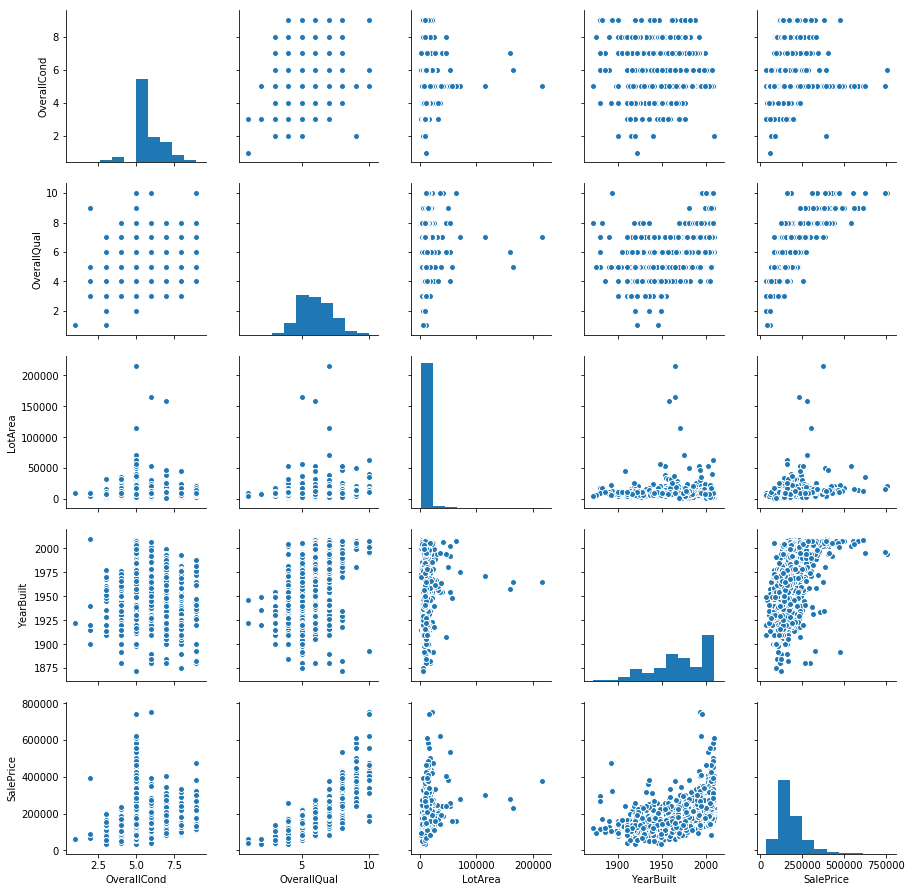

In [72]:
sns.pairplot(subset_data)

In [73]:
correlations['SalePrice'].sort_values()
# these are the most correlated numerical variables that are correlated with Sale Price 

OverallCond   -0.077856
LotArea        0.263843
YearBuilt      0.522897
OverallQual    0.790982
SalePrice      1.000000
Name: SalePrice, dtype: float64

## Is location a confounding factor to Sale Price?

To answer this question, I split the data into groups that are grouped by Neighborhood. By splitting the data even further into the most expensive neighborhood and the least expensive neighborhood, we have two groups of data that we can compare in order to judge whether location alone plays a significant role in sale price or if certain Neighborhoods just have houses that are of a higher average quality. If the two subsets of data ("Exp" being the most expensive neiborhood and "Chp" being the cheapest neighborhood) have a statistically significant difference across the most correlated variables to sale price found in the previous question, then we can conclude that the location alone does not play much of a factor and that it is the difference of quality in the houses within the two respective neighborhoods that determine the difference in sale price. 

In [74]:
neighborhood = subset_data.groupby("Neighborhood")
neighborhood['SalePrice'].median().sort_values().nlargest(n = 5, keep='first')

Neighborhood
NridgHt    315000
NoRidge    301500
StoneBr    278000
Timber     228475
Somerst    225500
Name: SalePrice, dtype: int64

In [75]:
neighborhood['SalePrice'].median().sort_values().nsmallest(n = 5, keep='first')

Neighborhood
MeadowV     88000
IDOTRR     103000
BrDale     106000
OldTown    119000
Edwards    121750
Name: SalePrice, dtype: int64

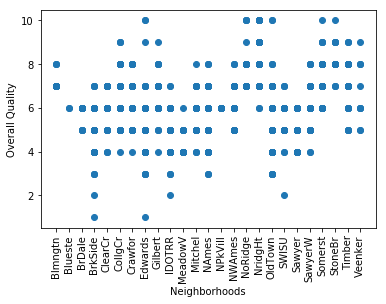

In [144]:
ax = plt.scatter(subset_data['Neighborhood'], subset_data['OverallQual'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhoods')
plt.ylabel('Overall Quality')
plt.show()

Now let's split up the data into two subsets of the original data. One where the neighborhood is the most expensive neighborhood "No Ridge" and the other the least expensive, "MeadowV".

In [77]:
#compare top vs bottom (NoRidge vs Blmngtn)
Exp = subset_data.loc[subset_data['Neighborhood'] == "NridgHt"]
Chp = subset_data.loc[subset_data['Neighborhood'] == "MeadowV"]

In [78]:
Exp['LotArea'].median()

11694.0

In [79]:
Chp['LotArea'].median()

1974.0

In [80]:
Exp.loc[Exp['HouseStyle']=='2Story'].count()[1]

26

In [81]:
Chp.loc[Chp['HouseStyle']=='2Story'].count()[1]

8

A quick glance into some of the variables comparing the two neighborhoods show that there are major differences between the two groups. We shall conduct a few T-tests to ensure that the two means are statistically significant!

In [82]:
stats.normaltest(subset_data['OverallQual'])
# NOT NORMAL!!!!! NORMALIZE DATA 

NormaltestResult(statistic=11.90456395354198, pvalue=0.0025999008305689617)

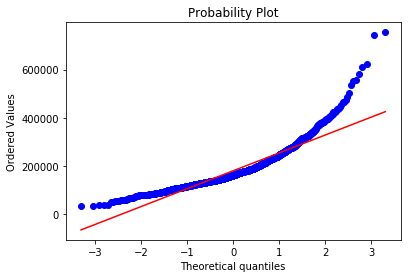

In [83]:
stats.probplot(subset_data['SalePrice'], plot = plt)
plt.show()

Wait, the data set isnt normal! One of the t-tests major assumptions is that the dataset is distributed normally. Which in this case, judging by the Q-Q plot and the normal-test from the scipy package, there is a very low chance that the plot is normal. We'd need to adjust by either normalizing the data, or we can utilize the mann whitney - U test in place of the t-tests. In this situation, I've decided to use the Mann-Whitney U test to compare the two means. This is also the reason why I have chosen to use the median values rather than the mean values to determine the most expensive and the least expensive groups. 

Now lets conduct a couple of Mann-Whitney U Tests:


In [84]:
stats.mannwhitneyu(Exp['OverallQual'], Chp['OverallQual'])

MannwhitneyuResult(statistic=1.0, pvalue=2.4843256547705775e-11)

In [85]:
stats.mannwhitneyu(Exp['YearBuilt'],Chp['YearBuilt'])

MannwhitneyuResult(statistic=0.0, pvalue=4.883702601318784e-11)

In [86]:
stats.mannwhitneyu(Exp['LotArea'],Chp['LotArea'])

MannwhitneyuResult(statistic=20.0, pvalue=2.35949919447886e-10)

In [87]:
stats.mannwhitneyu(Exp['SalePrice'],Chp['SalePrice'])

MannwhitneyuResult(statistic=0.0, pvalue=6.612811573232954e-11)

Considering the p-values of all the tests being below 0.05, all of the differences between the two groups have proven to be significant, and is very unlikley to be due to chance.

Knowing that the p-values of these tests showing that the test results are statistically significant, and the Mann-Whitney U test statistic is consistently 0 accross all the tests. This means that all values in the expensive (Exp group) sample is greater than that of the values of the cheapest (Chp group) sample.  
 
Therefore, we can conclude that location does not have an effect on sale price directly, rather, certain neighbourhoods are populated with houses that possess the attributes of a high value home. 

## How have houses evolved accross time?

Lets take a look at a couple of variables and how they changed over time. We will explore Kitchen quality first. As you may have seen in the begining of this project, Kitchen Quality is denoted with a couple of categorical variables ('Ex', 'Fa' , 'Gd', 'TA') and is not particularly useful if we try to analyze it as is. So i created dummy variables for each category, 4 being the highest rating ('Ex') and 1 being the lowest rating ('TA') that someone can give. Lets explore how the average rating of kitchen quality has changed over the years.

In [88]:
years = subset_data['YearBuilt']
print(years.min(), years.max())

1872 2010


In [93]:
subset_data.loc[subset_data['KitchenQual'] =='Ex', 'KitchenQual'] = 4 
subset_data.loc[subset_data['KitchenQual'] =='Fa', 'KitchenQual'] = 3
subset_data.loc[subset_data['KitchenQual'] =='Gd', 'KitchenQual'] = 2 
subset_data.loc[subset_data['KitchenQual'] =='TA', 'KitchenQual'] = 1 

/Users/jameszhu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [124]:
avg_kit_qual = subset_data.groupby(subset_data['YearBuilt'])['KitchenQual'].mean()

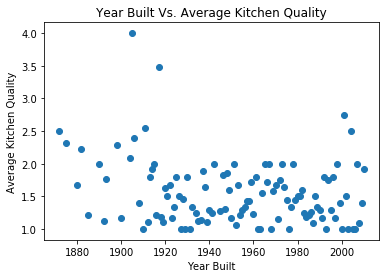

In [142]:
plt.scatter(years.unique(),avg_kit_qual)
plt.ylabel('Average Kitchen Quality')
plt.xlabel('Year Built')
plt.title('Year Built Vs. Average Kitchen Quality')
plt.show()

There does not seem to be a positive or negative trend on kitchen quality over the years, I think it is safe to say that Kitchen quality has remained unchanged for the most part. Lets explore Overall quality next, We will start by looking at the correlation between Year built and the overall quality.

In [127]:
Year_Quality = subset_data.groupby(years).mean()['OverallQual']

In [122]:
np.corrcoef(subset_data['YearBuilt'],subset_data['OverallQual'])

array([[1.        , 0.57232277],
       [0.57232277, 1.        ]])

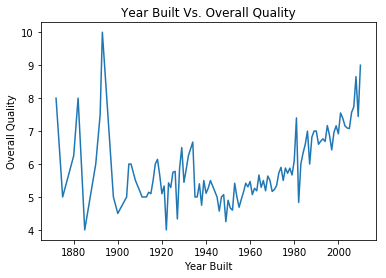

In [141]:
plt.plot(Year_Quality)
plt.xlabel('Year Built')
plt.ylabel('Mean Overall Quality')
plt.title('Year Built Vs. Overall Quality')
plt.show()

It seems as if that the average quality has been steadily rising since the 1940s. The correlation between year built and the overall quality of the houses has a positive value of 0.57. Personally, I think that the data may have been affected by the lack of houses and standard measure of house quality prior to the 1900's which is why we see so much variance (represented by the spikiness in the graph) before the 1900s. The last variable we will look at is Lot area. Lets take a look at the correlation between house size and year built.

In [128]:
np.corrcoef(subset_data['YearBuilt'],subset_data['LotArea'])

array([[1.        , 0.01422765],
       [0.01422765, 1.        ]])

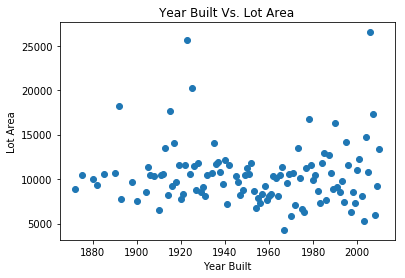

In [140]:
plt.scatter(years.unique(),subset_data.groupby(subset_data['YearBuilt'])['Mean Lot Area'].mean())
plt.xlabel('Year Built')
plt.ylabel('Lot Area')
plt.title('Year Built Vs. Lot Area')
plt.show()

Like Kitchen Quality, there does not seem to be much of a correlation between lot area and year built. It seeems that there is slightly more variance in as the years went by, possibly because of both more pople moving to urban areas, and the fact that we are better equipped to build larger houses now than we did before. 

## Conclusion


Lets circle back to the original three questions that we had: 

  1) What numerical factors are most heavily correlated with Sale Price?
  
  2) Is Location more influential to Sale Price than the most correlated numerical values?
  
  3) How has the Quality of houses evolved over the years?
    
We've explored the different correlation coefficients that our selected numerical variables had with relation to Sale Price, and visualized the trends with a scatter plot to find that Overall quality of the house and the year the house was built were the two most influential factors to house prices. We've also taken a look into whether these correlation values were valid and explored a possible confounder for sale price, the location. We concluded, through a series of Mann-Whitney U tests that the differences between the most expensive and least expensive neighorhood is statistically significant, and therefore dispelling the our hypothesis of the location of the houses being a confounding factor to the Sale Price of the house. Finally, we explored how the houses have evolved over the years and found that the quality of houses has shown a positive correlation to the year it was built, newer houses are generally of higher quality than the older ones. We also took a look at how Kitchen Quality and Lot Area changed over the years and reached the conclusion that both variables have remained roughly unchanged over the years. 

If I were to come back to this project after further education, I would definitely take a deeper dive into the other variables that were excluded in the beginning of this project. I've also noticed whilst completing this project that there may be a couple of outliers in the data that are skewing the results, If i were to come back to this at a later date, I would seek ways to determine the outliers and remove them before completing any further analysis. I'm also positive that there will be plenty of other interesting questions that arise the more i acrue more knowledge in the analytical space, and i'm excited to continue learning and exploring the different insights that can be collected through the data!